In [1]:
filename = '2-spiral.txt'
f = open(filename,'r')

datapoints = []

for x in f:
    temp_ls = []
    temp = ''
    for ch in x:
        if (ch >= '0' and ch <='9') or (ch == '.') or (ch == '-'):
#             print('ch:' + ch +' temp:' + temp)
            temp += ch
        elif ch == ',':
#             print('temp:' + temp)
            temp_ls.append(float(temp))
            temp = ''
        else:
            if(temp_ls != []):
                datapoints.append(temp_ls)
            break

print(datapoints)

[[1.5, 0.0], [1.50973, 0.028461], [1.51892, 0.057289], [1.52755, 0.086473], [1.53562, 0.116003], [1.54312, 0.145868], [1.55003, 0.176056], [1.55635, 0.206556], [1.56207, 0.237356], [1.56717, 0.268445], [1.57166, 0.29981], [1.57552, 0.331439], [1.57873, 0.363319], [1.58131, 0.395437], [1.58323, 0.42778], [1.58448, 0.460335], [1.58508, 0.493089], [1.58499, 0.526027], [1.58422, 0.559137], [1.58277, 0.592403], [1.58062, 0.625812], [1.57777, 0.659349], [1.57421, 0.692999], [1.56995, 0.726748], [1.56497, 0.760581], [1.55926, 0.794483], [1.55283, 0.828439], [1.54567, 0.862433], [1.53778, 0.896449], [1.52916, 0.930473], [1.51979, 0.964488], [1.50968, 0.998479], [1.49883, 1.03243], [1.48723, 1.06632], [1.47488, 1.10015], [1.46179, 1.13388], [1.44794, 1.16751], [1.43334, 1.20101], [1.41799, 1.23438], [1.40189, 1.2676], [1.38504, 1.30064], [1.36744, 1.3335], [1.34909, 1.36615], [1.32999, 1.39858], [1.31015, 1.43078], [1.28956, 1.46272], [1.26823, 1.49439], [1.24616, 1.52577], [1.22336, 1.55685], 

In [2]:
for i in range(len(datapoints)):
    print(str(i) + ': ' + str(datapoints[i]))

0: [1.5, 0.0]
1: [1.50973, 0.028461]
2: [1.51892, 0.057289]
3: [1.52755, 0.086473]
4: [1.53562, 0.116003]
5: [1.54312, 0.145868]
6: [1.55003, 0.176056]
7: [1.55635, 0.206556]
8: [1.56207, 0.237356]
9: [1.56717, 0.268445]
10: [1.57166, 0.29981]
11: [1.57552, 0.331439]
12: [1.57873, 0.363319]
13: [1.58131, 0.395437]
14: [1.58323, 0.42778]
15: [1.58448, 0.460335]
16: [1.58508, 0.493089]
17: [1.58499, 0.526027]
18: [1.58422, 0.559137]
19: [1.58277, 0.592403]
20: [1.58062, 0.625812]
21: [1.57777, 0.659349]
22: [1.57421, 0.692999]
23: [1.56995, 0.726748]
24: [1.56497, 0.760581]
25: [1.55926, 0.794483]
26: [1.55283, 0.828439]
27: [1.54567, 0.862433]
28: [1.53778, 0.896449]
29: [1.52916, 0.930473]
30: [1.51979, 0.964488]
31: [1.50968, 0.998479]
32: [1.49883, 1.03243]
33: [1.48723, 1.06632]
34: [1.47488, 1.10015]
35: [1.46179, 1.13388]
36: [1.44794, 1.16751]
37: [1.43334, 1.20101]
38: [1.41799, 1.23438]
39: [1.40189, 1.2676]
40: [1.38504, 1.30064]
41: [1.36744, 1.3335]
42: [1.34909, 1.36615]
43

In [3]:
print(len(datapoints))

999


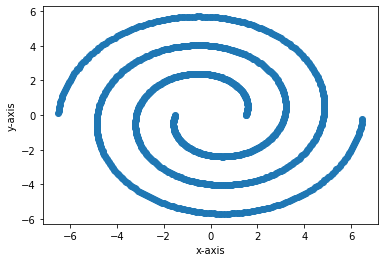

In [5]:
import matplotlib.pyplot as plt 

x_arr = []
y_arr = []

for point in datapoints:
    x_arr.append(point[0])
    y_arr.append(point[1])

plt.scatter(x_arr, y_arr) 
# plt.scatter(num_clusters, sse, c = 'red', marker = 'x')

plt.xlabel('x-axis') 
plt.ylabel('y-axis') 

# plt.title('SSE vs num of clusters') 

plt.show() 


In [6]:
import random
def assign_random_means(K):
    means_index = random.sample(range(0, 149), K)
    cluster_means = []
    for i in range(K):
        temp_pt = datapoints[means_index[i]]
        cluster_means.append(temp_pt)
    
#     print(cluster_means)
    return cluster_means


In [7]:
def distance(point_a,point_b):
    sum = 0
    for i in range(len(point_a)):
        sum += (point_a[i]-point_b[i])**2
    
    return (sum)

In [8]:
def create_clusters(cluster_means,K):
    cluster = {}
    for i in range(K):
        cluster[i] = []

    for point in datapoints:
        min_dist = 1000
        temp_cluster = -1
        for mean_index in range(len(cluster_means)):
            temp_distance = distance(point,cluster_means[mean_index])
            if temp_distance < min_dist:
                min_dist = temp_distance
                temp_cluster = mean_index

        cluster[temp_cluster].append(point)
    return cluster
        

In [9]:
def update_mean(cluster):
    new_means = []
    for c in cluster:
        temp_ls = cluster[c]
        if temp_ls == []:
            continue
        sum_ls = []
        dimension = len(temp_ls[0])
#         print('dimension:' + str(dimension))
        
        for i in range(dimension):
            sum_ls.append(0)
        
        for i in range(len(temp_ls)):
            for j in range(dimension):
                sum_ls[j] += temp_ls[i][j]
        
        avg_point = []
        for j in range(dimension):
            avg_point.append(sum_ls[j]/len(temp_ls))
        
        new_means.append(avg_point)
    return new_means

In [10]:
def converge(new_means, prev_means, allowed_diff):
    diff = 0
    for i in range(len(new_means)):
        dimension = len(new_means[0])
        for j in range(dimension):
            diff += abs(new_means[i][j] - prev_means[i][j])
    
    if diff <= allowed_diff:
        return True
    
    return False

In [11]:
def perform_K_means(K):

    cluster = {}
    for i in range(K):
        cluster[i] = []
        
    cluster_means = assign_random_means(K)

    allowed_diff = 0
    iteration_count = 0

    while(True):
        cluster = create_clusters(cluster_means,K)
    #     print(cluster)
        prev_means = cluster_means
        new_means = update_mean(cluster)

#         print('iteration count:' + str(iteration_count))
        iteration_count += 1
    #     print(cluster_means)
#         print()
#         print(new_means)
        flag = 0
#         print()
        if converge(new_means, prev_means, allowed_diff):
#             print('convergence')
            flag = 1
            break
        else:
            cluster_means = new_means

        if flag == 1:
            break
    
    return (cluster,new_means)

In [12]:
def calculate_sse(cluster,means,k):
    total_sum = 0;
    for i in range(k):
        for j in range(len(cluster[i])):
            diff = 0
            dimension = len(cluster[i][0])
            for d in range(dimension):
                diff += (cluster[i][j][d] - means[i][d])
            
            total_sum += diff**2
    
    return total_sum

In [13]:
sse = []

for i in range(1,30):
    print('i:' + str(i))
    (final_clusters,final_means)= perform_K_means(i)
    sse.append(calculate_sse(final_clusters,final_means,i))

i:1
i:2
i:3
i:4
i:5
i:6
i:7
i:8
i:9
i:10
i:11
i:12
i:13
i:14
i:15
i:16
i:17
i:18
i:19
i:20
i:21
i:22
i:23
i:24
i:25
i:26
i:27
i:28
i:29


In [14]:
len(sse)

29

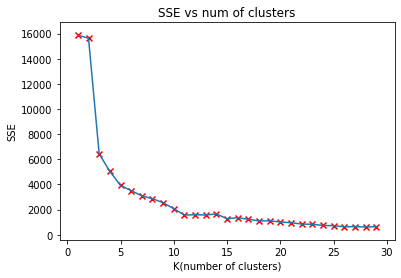

In [15]:
import matplotlib.pyplot as plt 

num_clusters = []
for i in range(1,30):
    num_clusters.append(i)

plt.plot(num_clusters, sse) 
plt.scatter(num_clusters, sse, c = 'red', marker = 'x')

plt.xlabel('K(number of clusters)') 
plt.ylabel('SSE') 

plt.title('SSE vs num of clusters') 

plt.show() 


In [16]:
print(sse)

[15880.96343999543, 15633.202991707558, 6426.081629810752, 5040.152749132121, 3919.705719899709, 3507.490928748801, 3089.0741537386275, 2864.8772537333534, 2542.5116255243, 2070.0717430679547, 1560.6990449656394, 1588.6536373747942, 1562.7717459088233, 1649.3623118987464, 1262.948294150484, 1353.5601458161045, 1222.390735564008, 1096.3391901037487, 1102.091237275532, 1011.788231171915, 949.6613323136265, 846.9754009883563, 824.1318439817719, 735.0736558191984, 713.9632733548444, 630.3096500956322, 640.7803436336923, 610.8208328391296, 634.4723199295715]


In [18]:
import time

start = time.time()
(final_clusters,final_means)= perform_K_means(2)
end = time.time()

print('time taken for 3 clusters:' + str(end-start))

time taken for 3 clusters:0.09474468231201172
